# Assignment 2, Q 8
Sagrika Nagar(20171204)

# Q 8, Part 1

In [2]:
import matplotlib.pyplot as plt
import cv2
import time
import numpy as np
from math import floor

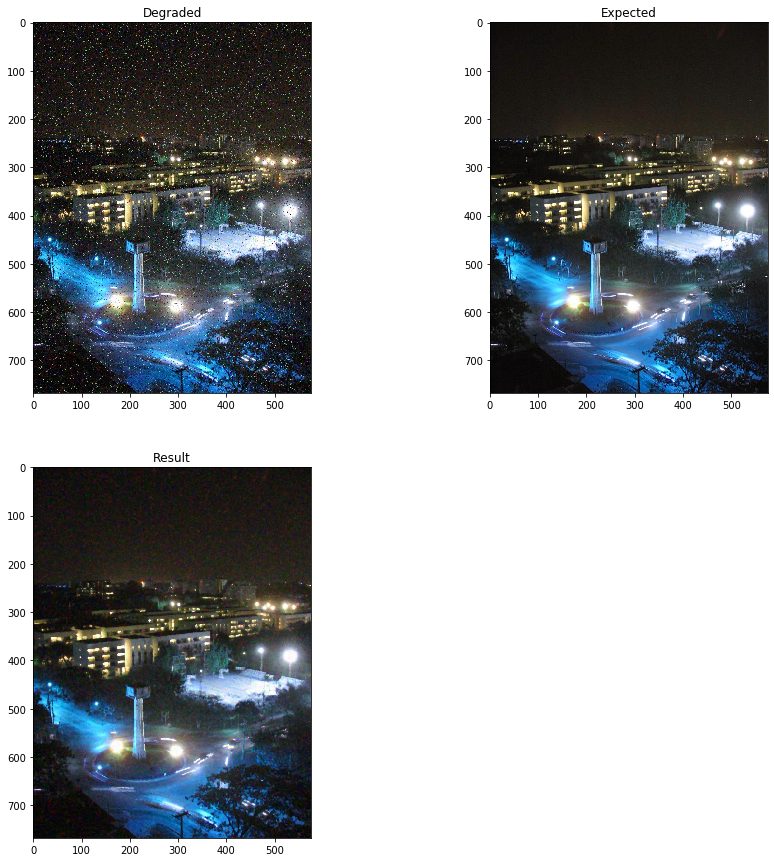

In [6]:
im = cv2.imread("Degraded.jpg")

expected = cv2.imread("Clear.jpg")

# im = np.array(im)
w, h, n = im.shape

out = np.zeros(im.shape)

start = time.time()

for i in range(1, w-1):
    for j in range(1, h-1):

        out[i,j,0] = np.median(im[i-1:i+2,j-1:j+2,0])
        out[i,j,1] = np.median(im[i-1:i+2,j-1:j+2,1])
        out[i,j,2] = np.median(im[i-1:i+2,j-1:j+2,2])
        
cv2.normalize(out, out, 0, 255, cv2.NORM_MINMAX, dtype=-1)

out = out.astype(np.uint8)
end = time.time()

# print(end-start)
f = plt.subplots(figsize=(15,15))

plt.subplot(221)
plt.imshow(im)
plt.title("Degraded")
plt.subplot(222)
plt.imshow(expected)
plt.title("Expected")
plt.subplot(223)
plt.imshow(out)
plt.title("Result")

plt.show()

The degradation in the image is caused by salt and pepper noise.

# Median filter

Median filter was applied on the degraded image to restore it. The median filter allows a great deal of high spatial frequency detail to pass while remaining very effective at removing salt and pepper noise. This is done by moving through the image pixel by pixel, replacing each value with the median value of neighbouring pixels. The pattern of neighbours is called the "window", which slides, pixel by pixel over the entire image 2 pixel, over the entire image. Here, I used the numpy function "median" to calculate the median of the window.